## 1. EDA DATA

#### 1.1 EDA Old Dataset

In [1]:
from glob import glob
import matplotlib.pyplot as plt

def visualize_dataset(plt, data, title):
    sorted_data = sorted(data.items())
    names = list(data.keys())
    values = list(data.values())
    plt.bar(names, values)
    plt.xticks(rotation=90)
    plt.xlabel('Class Name')
    plt.ylabel('Count')
    plt.title(title)
    plt.tight_layout()

    plt.show()

In [2]:
path_folder = 'lab05-data/dataset/data_old_class'
train_path = f"{path_folder}/train"
test_path = f"{path_folder}/test"

In [3]:
count_dataset = {
    'train':{},
    'test':{}
}
for type_dataset in ['test', 'train']:
  for folder_class in glob(f"{path_folder}/{type_dataset}/*"):
    class_name = folder_class.split("\\")[-1]
    count_dataset[type_dataset][class_name] = len(glob(f"{folder_class}/*"))


In [4]:
count_dataset

{'train': {'chuckwagon racing': 120,
  'cricket': 129,
  'croquet': 134,
  'curling': 141,
  'disc golf': 123,
  'fencing': 135,
  'field hockey': 157,
  'figure skating men': 128,
  'figure skating pairs': 151,
  'figure skating women': 157,
  'fly fishing': 134,
  'football': 191,
  'formula 1 racing': 190,
  'frisbee': 131,
  'gaga': 118,
  'giant slalom': 150,
  'golf': 157,
  'hammer throw': 122,
  'hang gliding': 121,
  'harness racing': 147,
  'high jump': 158,
  'hockey': 172,
  'horse jumping': 134,
  'horse racing': 139,
  'horseshoe pitching': 102,
  'hurdles': 136,
  'hydroplane racing': 108,
  'ice climbing': 130,
  'ice yachting': 112,
  'jai alai': 132,
  'javelin': 136,
  'jousting': 118,
  'judo': 150,
  'lacrosse': 151,
  'log rolling': 128,
  'luge': 127,
  'motorcycle racing': 132,
  'mushing': 111,
  'nascar racing': 189,
  'olympic wrestling': 167,
  'parallel bar': 131,
  'pole climbing': 118,
  'pole dancing': 112,
  'pole vault': 138,
  'polo': 157,
  'pommel h

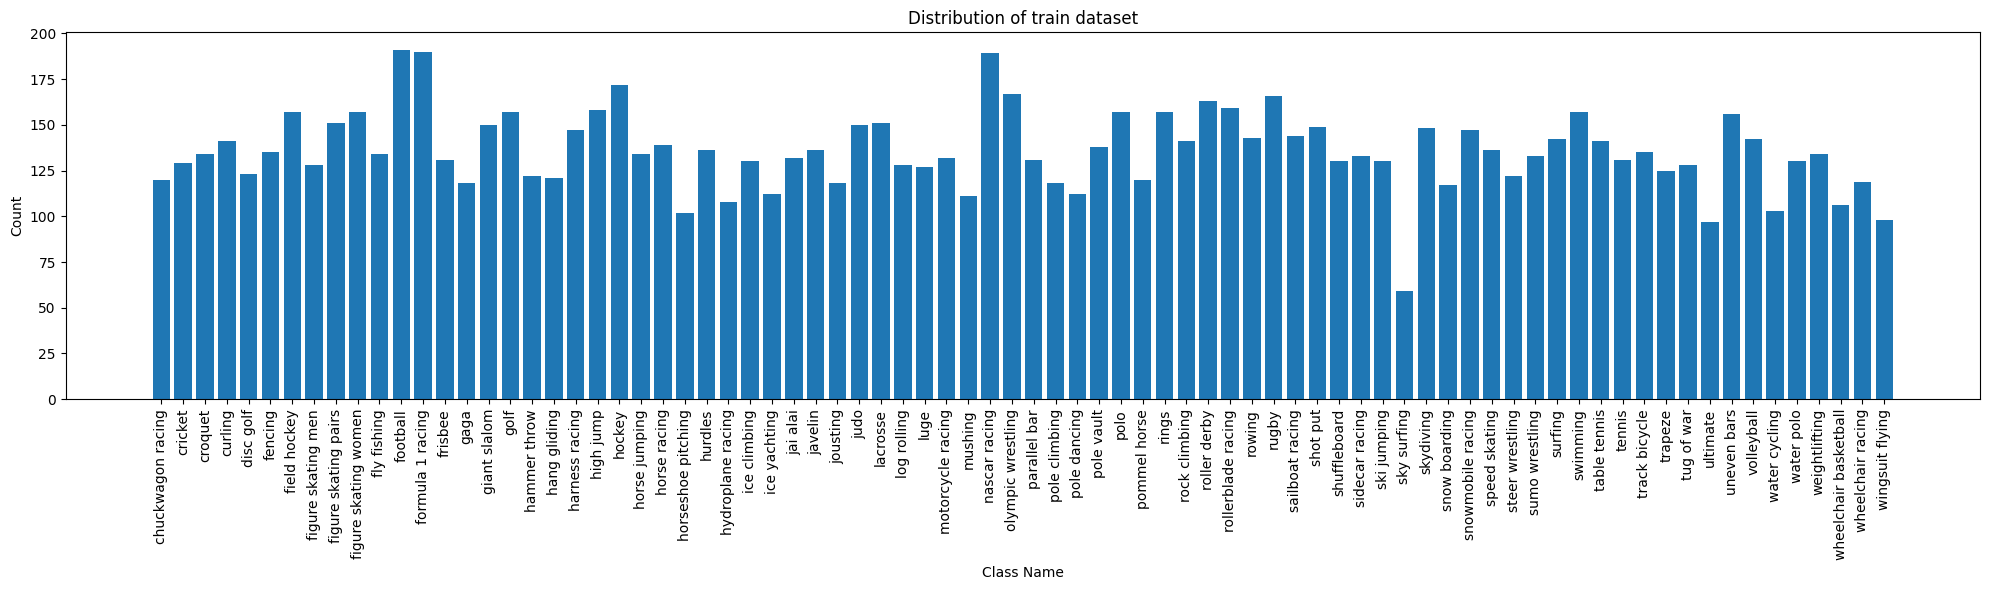

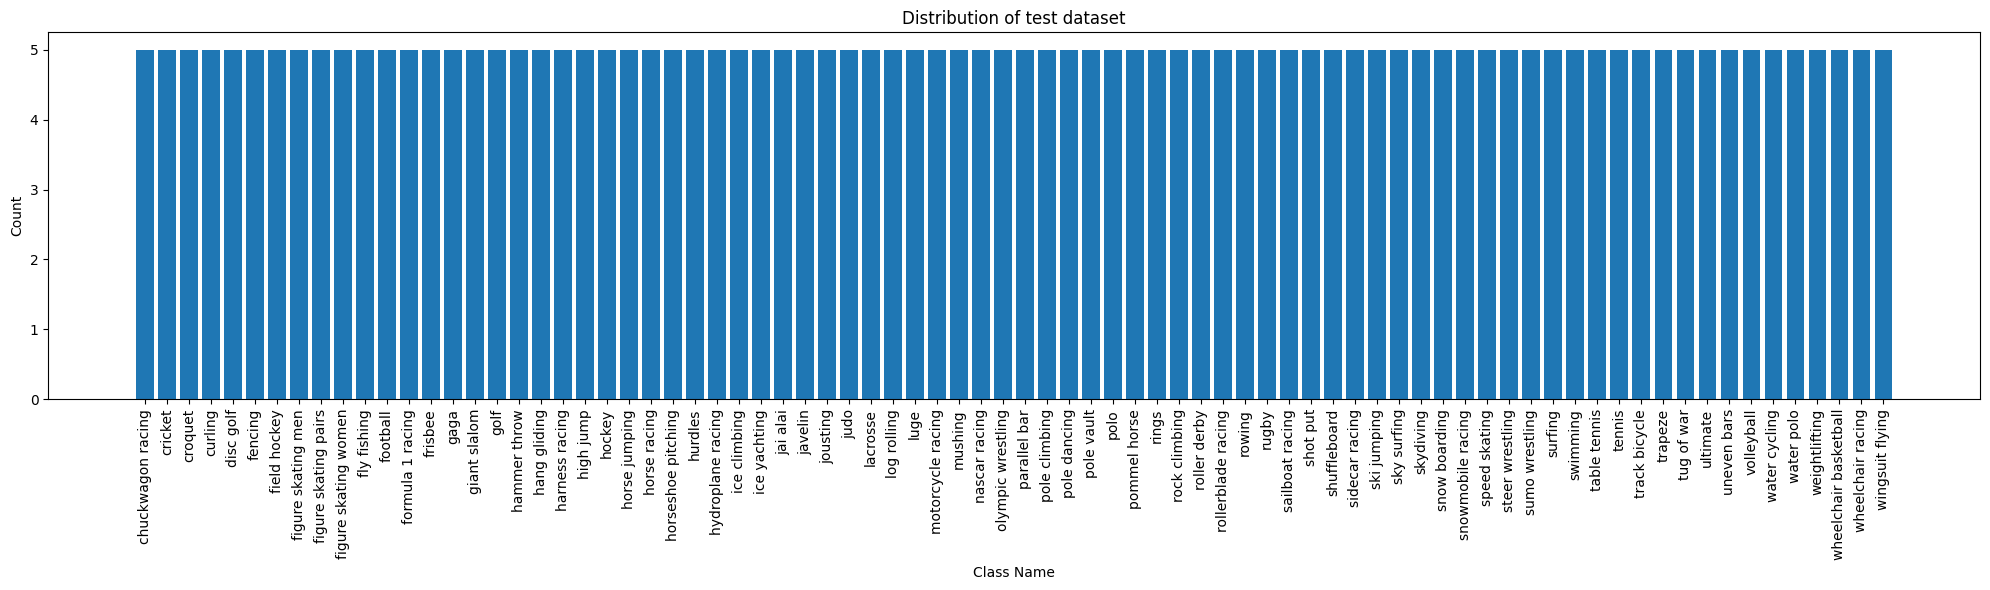

In [5]:
## Visualize Data train
data = count_dataset['train']

plt.figure(figsize=(20, 6))
visualize_dataset(
    plt,
    data,
    'Distribution of train dataset'
    )

## Visualize Data test
data = count_dataset['test']

plt.figure(figsize=(20, 6))
visualize_dataset(
    plt,
    data,
    'Distribution of test dataset'
    )

#### 1.2 EDA New Dataset

In [6]:
path_folder = 'lab05-data/dataset/data_new_class'
train_path = f"{path_folder}/train"
test_path = f"{path_folder}/train"

count_dataset = {
    'train':{},
    'test':{}
}
for type_dataset in ['test', 'train']:
  for folder_class in glob(f"{path_folder}/{type_dataset}/*"):
    class_name = folder_class.split("\\")[-1]
    count_dataset[type_dataset][class_name] = len(glob(f"{folder_class}/*"))


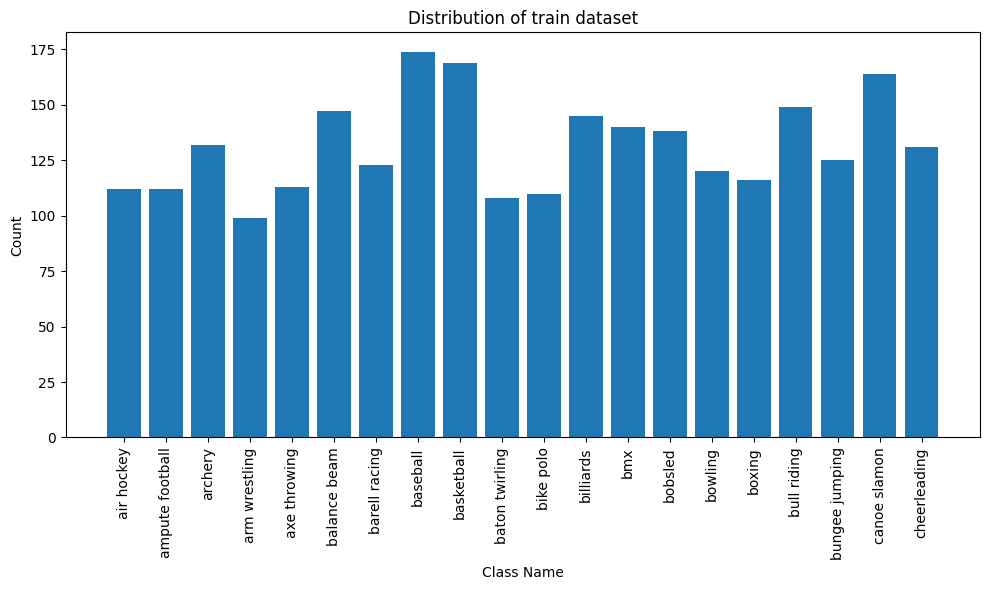

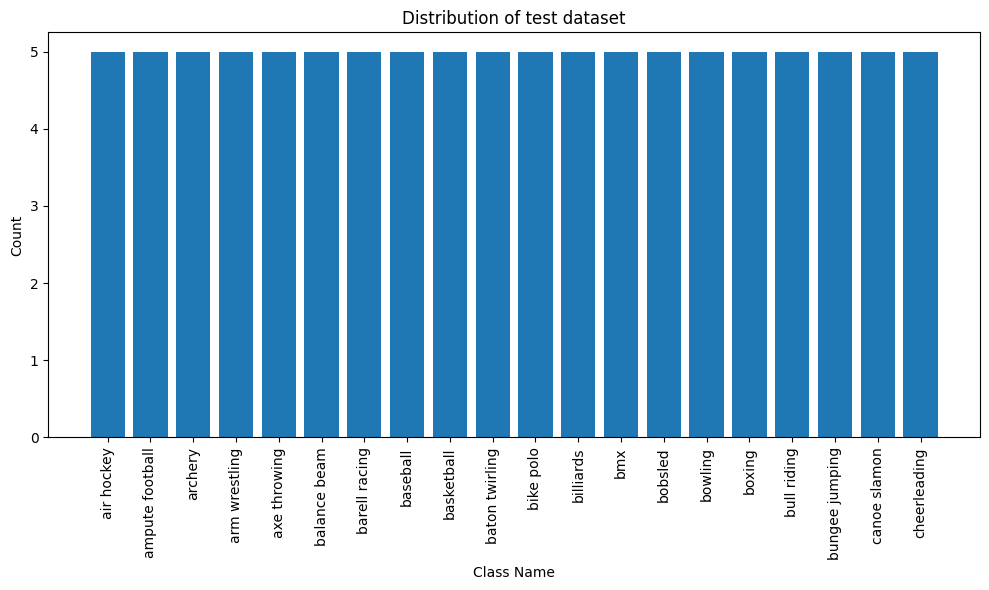

In [7]:
## Visualize Data train
data = count_dataset['train']

plt.figure(figsize=(10, 6))
visualize_dataset(
    plt,
    data,
    'Distribution of train dataset'
    )
## Visualize Data test
data = count_dataset['test']

plt.figure(figsize=(10, 6))
visualize_dataset(
    plt,
    data,
    'Distribution of test dataset'
    )

In [8]:
classes_new_labels = list(data.keys())
classes_new_labels

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'axe throwing',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'baton twirling',
 'bike polo',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'bungee jumping',
 'canoe slamon',
 'cheerleading']

#### 1.3. EDA reference fewshot and oneshot

In [9]:
path_folder_reference_one_shot = 'lab05-data/dataset/one_shot_reference'
path_folder_reference_few_shot = 'lab05-data/dataset/few_shot_reference'
count_dataset_oneshot = {}

for folder_class in glob(f"{path_folder_reference_one_shot}/*"):
  class_name = folder_class.split("\\")[-1]
  if class_name in classes_new_labels:
    count_dataset_oneshot[class_name] = len(glob(f"{folder_class}/*"))

count_dataset_fewshot = {}
for folder_class in glob(f"{path_folder_reference_few_shot}/*"):
  class_name = folder_class.split("\\")[-1]
  if class_name in classes_new_labels:
    count_dataset_fewshot[class_name] = len(glob(f"{folder_class}/*"))


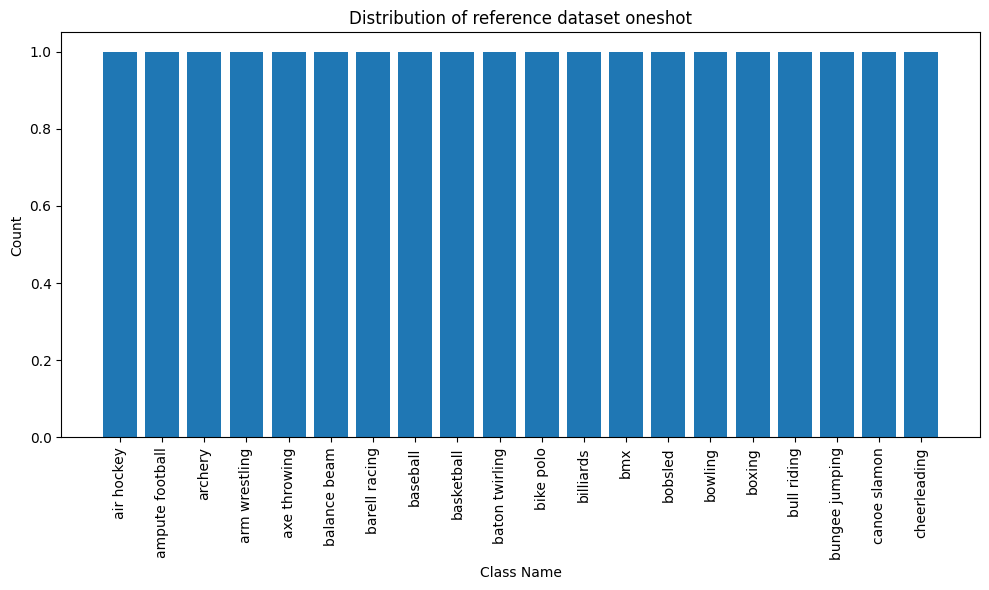

In [10]:
## Visualize dataset oneshot
plt.figure(figsize=(10, 6))
visualize_dataset(
    plt,
    count_dataset_oneshot,
    'Distribution of reference dataset oneshot'
    )


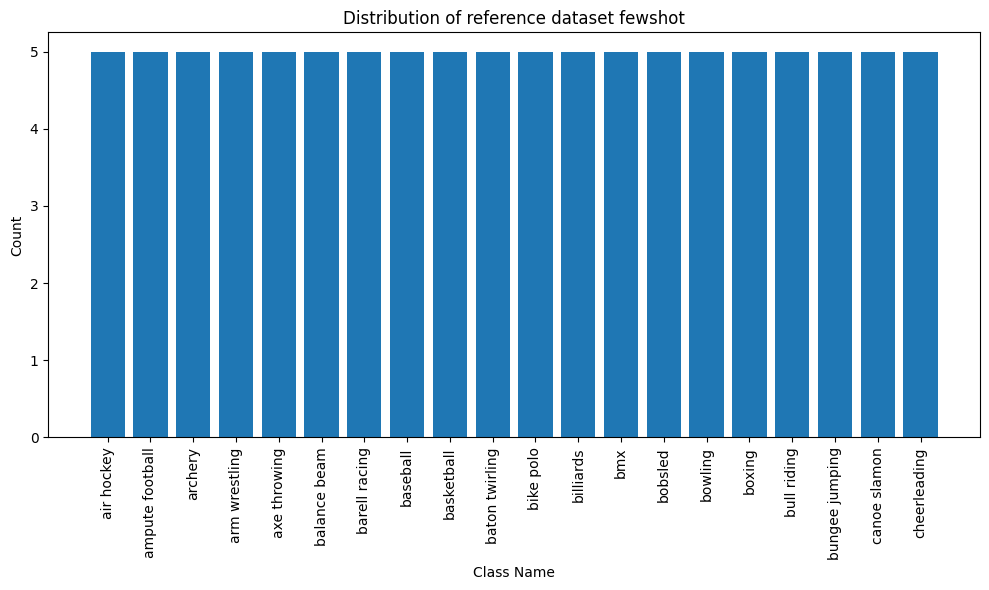

In [11]:
## Visualize dataset fewshot
plt.figure(figsize=(10, 6))
visualize_dataset(
    plt,
    count_dataset_fewshot,
    'Distribution of reference dataset fewshot'
    )


## 2. Configs

In [12]:
import torch
import random
import numpy as np
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from datasets import load_dataset
from transformers import AutoFeatureExtractor

In [13]:
# Cố định việc sinh ngẫu nhiên của numpy và torch
def setup_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)


In [17]:
class CFG:
    batch_size = 64
    name_weight = "classification_model"
    pretrain_name = "microsoft/beit-base-patch16-224"
    path_dataset = "lab05-data/dataset/data_old_class"
    lr = 5e-5
    num_train_epochs = 10
cfg = CFG()
setup_seed(10)

## 3. Create dataset

In [15]:
# Tạo các transform để  resize dữ liệu về đúng kích thước
# Chuẩn hóa dữ liệu đầu vào
# Chuyển về dạng tensor
def load_transforms():
    train_transforms = A.Compose(
        [
            A.Resize(224, 224),
            A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
            ToTensorV2()
        ]
    )
    val_transforms = A.Compose(
        [
            A.Resize(224, 224),
            A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
            ToTensorV2()
        ]
    )
    return train_transforms, val_transforms



# Load transforms dữ liệu
train_transforms, val_transforms = load_transforms()

def preprocess_train(example_batch):
    example_batch["pixel_values"] = [
        train_transforms(image = np.array(image))["image"] for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    example_batch["pixel_values"] = [
        val_transforms(image = np.array(image))["image"] for image in example_batch["image"]
        ]
    return example_batch

In [18]:
# Load pretrain Extractor
feature_extractor = AutoFeatureExtractor.from_pretrained(cfg.pretrain_name)
# Load dataset
dataset = load_dataset(cfg.path_dataset)

Resolving data files:   0%|          | 0/10865 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/400 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [19]:
## Dataset lúc này chỉ có hai biến là 'image' và 'label'
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10865
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 400
    })
})


In [20]:
## Thêm trường "pixel_values", cái này chính là input của mô hình beit (huggingface define)
dataset["train"].set_transform(preprocess_train)
dataset["test"].set_transform(preprocess_val)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 10865
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 400
    })
})


In [21]:
train_ds = dataset["train"]
test_ds = dataset["test"]
print(train_ds)

Dataset({
    features: ['image', 'label'],
    num_rows: 10865
})


In [22]:
# Create label to idx
labels = dataset["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

## 4. Modeling

In [23]:
%%capture
!pip install evaluate
!pip install wandb
import os
os.environ["WANDB_DISABLED"] = "true"

In [24]:
import evaluate
from transformers import (
    AutoModelForImageClassification,
    )

In [25]:
# Định nghĩa các tính metrics là accuracy
metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)


def collate_fn(examples):
    """
      Nhận đầu vào là một batch dữ liệu
      Từ đó xử lý và trả về format
      {
          "pixel_values": tensor_batch_pixel_values,
          "labels": tensor_batch_labels
      }
      hai keys pixel_values và labels vừa là tên biến để truyển vào mô hình

    """
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [28]:
model_name = cfg.pretrain_name.split("/")[-1]
# Load model
model = AutoModelForImageClassification.from_pretrained(
    cfg.pretrain_name,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes = True,
)

c:\Users\DAT NGUYEN\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DAT NGUYEN\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of BeitForImageClassification were not initialized from the model checkpoint at microsoft/beit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([80, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([80]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 5. Training with Trainer of Huggingface

In [29]:
from transformers import (
    TrainingArguments,
    Trainer
    )

In [30]:
args = TrainingArguments(
        f"finetuned-{cfg.name_weight}", # Tên thư mục để lưu kết quả huấn luyện
        remove_unused_columns=False,    # Giữ lại các cột dữ liệu trong tập dữ liệu ban đầu, kể cả cột không xài
        evaluation_strategy = "epoch",  # Đánh giá mô hình sau mỗi epoch
        save_strategy = "epoch",        # Lưu mỗi mô hình sau mỗi epoch
        learning_rate=cfg.lr,           # Cài đặt learning rate
        per_device_train_batch_size=cfg.batch_size, # Batch size train
        per_device_eval_batch_size=cfg.batch_size,  # Batch size test
        num_train_epochs=cfg.num_train_epochs,      # Cài đặt max epochs
        warmup_ratio=0.1,                 # Tỉ lệ warming up cho learning rate scheduler.
        logging_steps=5,                  # Số lượng bước cập nhật log thông tin trong quá trình huấn luyện.
        load_best_model_at_end=True,      # Tải mô hình tốt nhất (dựa trên metric đã chọn) sau khi hoàn thành quá trình huấn luyện.
        metric_for_best_model="accuracy", # Chọn metric để xác định mô hình tốt nhất.
        save_total_limit=2,               # Giới hạn số lượng checkpoints được lưu lại.
    )


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [31]:
trainer = Trainer(
    model,                       # Mô hình bạn muốn huấn luyện
    args,                        # Truyền các cấu hình mà bạn đã khai báo trước đó
    train_dataset=train_ds,      # Tập train dataset
    eval_dataset=test_ds,        # Tập evaluation dataset
    tokenizer=feature_extractor, # Feature extractor tương ứng với mô hình
    compute_metrics=compute_metrics, # Định nghĩa các tính metrics
    data_collator=collate_fn,        # Hàm tổ chức lại batch dữ liệu, trước khi được đưa vào mô hình
)

# Khởi chạy việc huấn luyện mô hình
train_results = trainer.train()


c:\Users\DAT NGUYEN\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Trainer is attempting to log a value of "{0: 'chuckwagon racing', 1: 'cricket', 2: 'croquet', 3: 'curling', 4: 'disc golf', 5: 'fencing', 6: 'field hockey', 7: 'figure skating men', 8: 'figure skating pairs', 9: 'figure skating women', 10: 'fly fishing', 11: 'football', 12: 'formula 1 racing', 13: 'frisbee', 14: 'gaga', 15: 'giant slalom', 16: 'golf', 17: 'hammer throw', 18: 'hang gliding', 19: 'harness racing', 20: 'high jump', 21: 'hockey', 22: 'horse jumping', 23: 'horse racing', 24: 'horseshoe pitching', 25: 'hurdles', 26: 'hydroplane racing', 27: 'ice climbing', 28: 'ice yachting', 29: 'jai alai', 30: 'javelin', 31: 'jousting', 32: 'judo', 

  0%|          | 0/1700 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 38.00 MiB (GPU 0; 4.00 GiB total capacity; 5.80 GiB already allocated; 0 bytes free; 5.93 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
# Lưu lại mô hình vừa huấn luyện
trainer.save_model()

# Ghi lại các thông tin trong quá trình huấn luyện
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)

# Lưu lại trạng thái của trainer bao gồm: thông tin về epochs, các thông số khác, .. việc lưu giúp việc tiếp tục train trở nên đơn giản hơn
trainer.save_state()

In [ ]:
## Đánh giá chất lượng của mô hình trên tập train và tập test

print("="*10+"evaluation in test dataset"+"="*10)
test_dict=trainer.evaluate(test_ds, metric_key_prefix='test')
print(test_dict)

print("="*10+"evaluation in test dataset"+"="*10)
train_dict=trainer.evaluate(train_ds, metric_key_prefix='train')
print(train_dict)


In [ ]:
!zip -r finetuned-classification_model.zip /kaggle/working/finetuned-classification_model

In [ ]:
!du -sh finetuned-classification_model.zip

<a href="/kaggle/working/finetuned-classification_model.zip"> Download File </a>